In [1]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
trainX = pd.read_csv('data/X_train.csv')
testX = pd.read_csv('data/X_test.csv')

In [3]:
trainX_embeds = pd.read_csv('trainx_embeddings.csv')

In [7]:
trainX_embeds.head()

,Unnamed: 0,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Review,Review_Embeddings
0,0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,2.0,0.500000,234,unexplained anime review anxious see uncut ver...,[-1.30409852e-01 8.15416500e-02 -1.34464324e-...
1,1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,3.0,0.000000,4,great movie okay great,[-8.14704970e-02 1.55706763e-01 -9.92729962e-...
2,2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,1.0,0.083333,26,technical problem dvd like dinosaur collector ...,[-3.66773419e-02 3.83466706e-02 -5.69212288e-...
3,3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full com...,5.0,1.000000,157,heeeeyyyyy laaaaadeee come far best jerry lewi...,[-1.32892208e-01 6.55335267e-02 -8.56605674e-...
4,4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,4.0,1.000000,277,herzog great traveler natural human landscape ...,[ 2.24303147e-02 1.06055026e-01 -1.84788324e-...


In [34]:
trainX['Score'].value_counts()

Score
5.0    65313
4.0    27818
3.0    14482
1.0     7361
2.0     7309
Name: count, dtype: int64

In [38]:
sample_5 = trainX_embeds[trainX_embeds['Score'] == 5.0].sample(n=20000, random_state=42)
sample_4 = trainX_embeds[trainX_embeds['Score'] == 4.0].sample(n=20000, random_state=42)
sample_3 = trainX_embeds[trainX_embeds['Score'] == 3.0].sample(n=14000, random_state=42)
sample_2 = trainX_embeds[trainX_embeds['Score'] == 2.0].sample(n=7000, random_state=42)
sample_1 = trainX_embeds[trainX_embeds['Score'] == 1.0].sample(n=7000, random_state=42)

In [39]:
final_df = pd.concat([sample_1, sample_2, sample_3, sample_4, sample_5], ignore_index=True)

In [102]:
X = np.array([np.array(embeddings) for embeddings in trainX_embeds['Review_Embeddings'].values])

In [103]:
values_str = [x[1:-1].split() for x in X]

In [104]:
vector_array = np.array([np.array([float(value) for value in value_str]) for value_str in values_str])

In [45]:
import pickle 
with open('glove_fvs.pkl', 'wb') as f:
    pickle.dump(vector_array, f)

In [108]:
y = trainX_embeds['Score']

In [109]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(vector_array, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_val)

In [111]:
base_model1 = RandomForestClassifier()
base_model1.fit(X_train, y_train_encoded)

RandomForestClassifier()

Accuracy on testing set =  0.5676084556568671
RMSE on testing set =  1.27953115774676


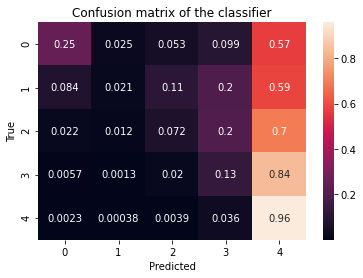

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = base_model1.predict(X_val)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [113]:
base_model2 = XGBClassifier()
base_model2.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on testing set =  0.6013820174183261
RMSE on testing set =  1.068531237541359


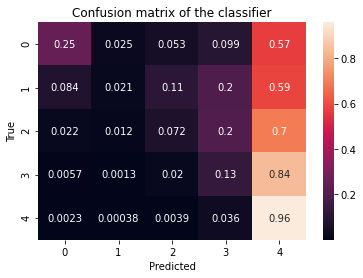

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions_2 = base_model2.predict(X_val)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions_2))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions_2)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [115]:
new_features = np.column_stack((Y_test_predictions, Y_test_predictions_2))

In [116]:
meta_model_2 = RandomForestClassifier(n_estimators=200)
meta_model_2.fit(new_features, y_test_encoded)

RandomForestClassifier(n_estimators=200)

In [117]:
final_predictions = meta_model_2.predict(new_features)

In [118]:
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, final_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, final_predictions)**0.5)

Accuracy on testing set =  0.602077114936419
RMSE on testing set =  1.0702709104371335
